In [8]:
# FRAUD CHECK

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn import preprocessing


In [9]:
data = pd.read_csv("Fraud_check (1).csv")

In [10]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [11]:
data["Tax_Income"] = ["Risky" if i  <= 30000 else "Good" for i in data["Taxable.Income"] ]

In [12]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
data.drop("Taxable.Income",axis=1,inplace=True)

In [14]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [15]:
data.shape

(600, 6)

In [16]:
data.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Tax_Income         0
dtype: int64

In [17]:
data.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


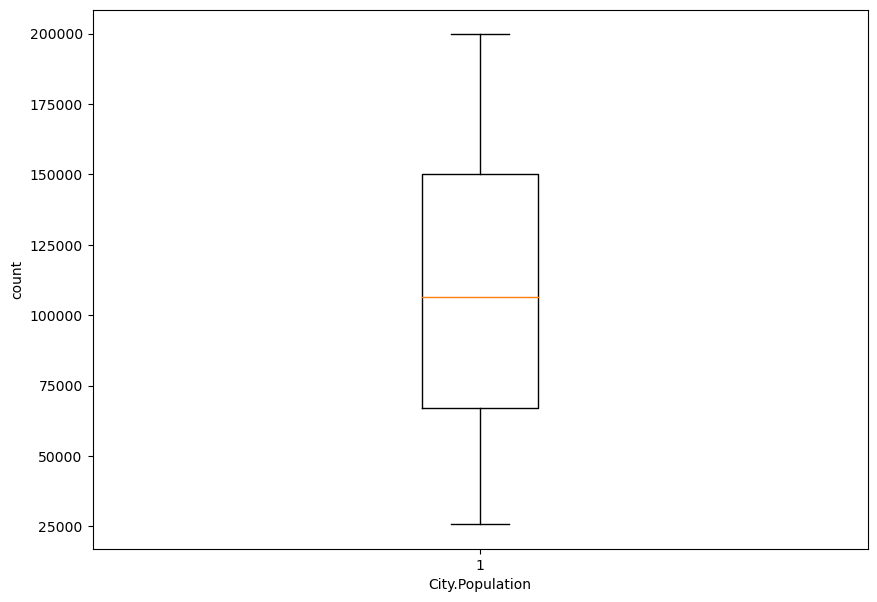

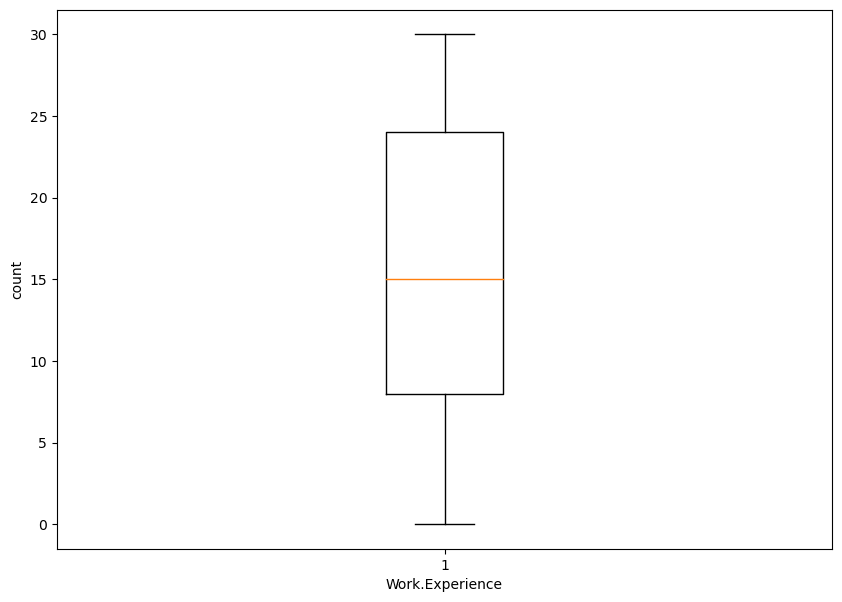

In [18]:
columns = list(data.columns)

for i in columns:
    if data[i].dtypes==object:
        pass
    else:
        plt.figure(figsize=(10,7))
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()    

In [19]:
# There are no outliers in the numeric columns
data.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Tax_Income'],
      dtype='object')

In [20]:
label_encoder = preprocessing.LabelEncoder()
data["Tax_Income"]= label_encoder.fit_transform(data['Tax_Income'])

In [21]:
data["Tax_Income"].value_counts()  # Imbalanced data : we will be moving with f1 score

0    476
1    124
Name: Tax_Income, dtype: int64

In [22]:
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [24]:
# As we have categorical datatypes we should first encode them to numerical

In [25]:
x_train , x_test , y_train , y_test = train_test_split( x, y , test_size = 0.20 , random_state = 10)

In [26]:
label_encoders = {}
for i in ['Undergrad', 'Marital.Status', 'Urban']:
    label_encoders[i] = preprocessing.LabelEncoder()
    x_train[i] = label_encoders[i].fit_transform(x_train[i])
    x_test[i] = label_encoders[i].transform(x_test[i])

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 284 to 265
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        480 non-null    int32
 1   Marital.Status   480 non-null    int32
 2   City.Population  480 non-null    int64
 3   Work.Experience  480 non-null    int64
 4   Urban            480 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 16.9 KB


In [28]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 69 to 339
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        120 non-null    int32
 1   Marital.Status   120 non-null    int32
 2   City.Population  120 non-null    int64
 3   Work.Experience  120 non-null    int64
 4   Urban            120 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 4.2 KB


In [53]:
model1 = DecisionTreeClassifier(criterion="gini",min_samples_split=5,max_depth=5)

In [54]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [55]:
pred = model1.predict(x_test)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.15      0.08      0.10        26

    accuracy                           0.71       120
   macro avg       0.46      0.48      0.46       120
weighted avg       0.64      0.71      0.67       120



In [57]:
accuracy = metrics.accuracy_score(y_test,pred,)
precision = metrics.precision_score(y_test, pred , pos_label=1,average="weighted")
recall = metrics.recall_score(y_test,pred, pos_label=1,average="weighted")
f1_score = metrics.f1_score(y_test,pred , pos_label=1,average="weighted")
print("The accuracy is ",accuracy)
print("The precision is ",precision)
print("The Recall is ",recall)
print("The F1 score is ",f1_score)

The accuracy is  0.7083333333333334
The precision is  0.6409657320872274
The Recall is  0.7083333333333334
The F1 score is  0.6691542288557215


#IF F1 SCORE IS LOWER THEN IT MEANS THERE IS AN IMBALANCE BETWEEN THE PRECISION AND RECALL WHICH IS THE CASE HERE.
HOWEVER THE SCEANIOR HERE IS A FRAUD CHECK WHICH IS "  model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good" ".
Precision is high here which means the False Positives 


FURTHERMORE HOW TO DEAL WITH THE IMBALANCE DATA : IT IS BY LOOKING AT THE WEIGHTED AVERAGE  OF PRECISION , F1 SCORE RECALL .
HERE THE WEIGHTED AVG IS weighted avg      PRECISION : 0.64     , RECALL :  0.71  , F1 SCORE  :   0.67    and support   120


In [58]:
model1.score(x_train,y_train)

0.8145833333333333

In [59]:
model1.score(x_test,y_test)

0.7083333333333334

In [60]:
model1.feature_importances_

array([0.        , 0.08062271, 0.62973378, 0.21193154, 0.07771197])

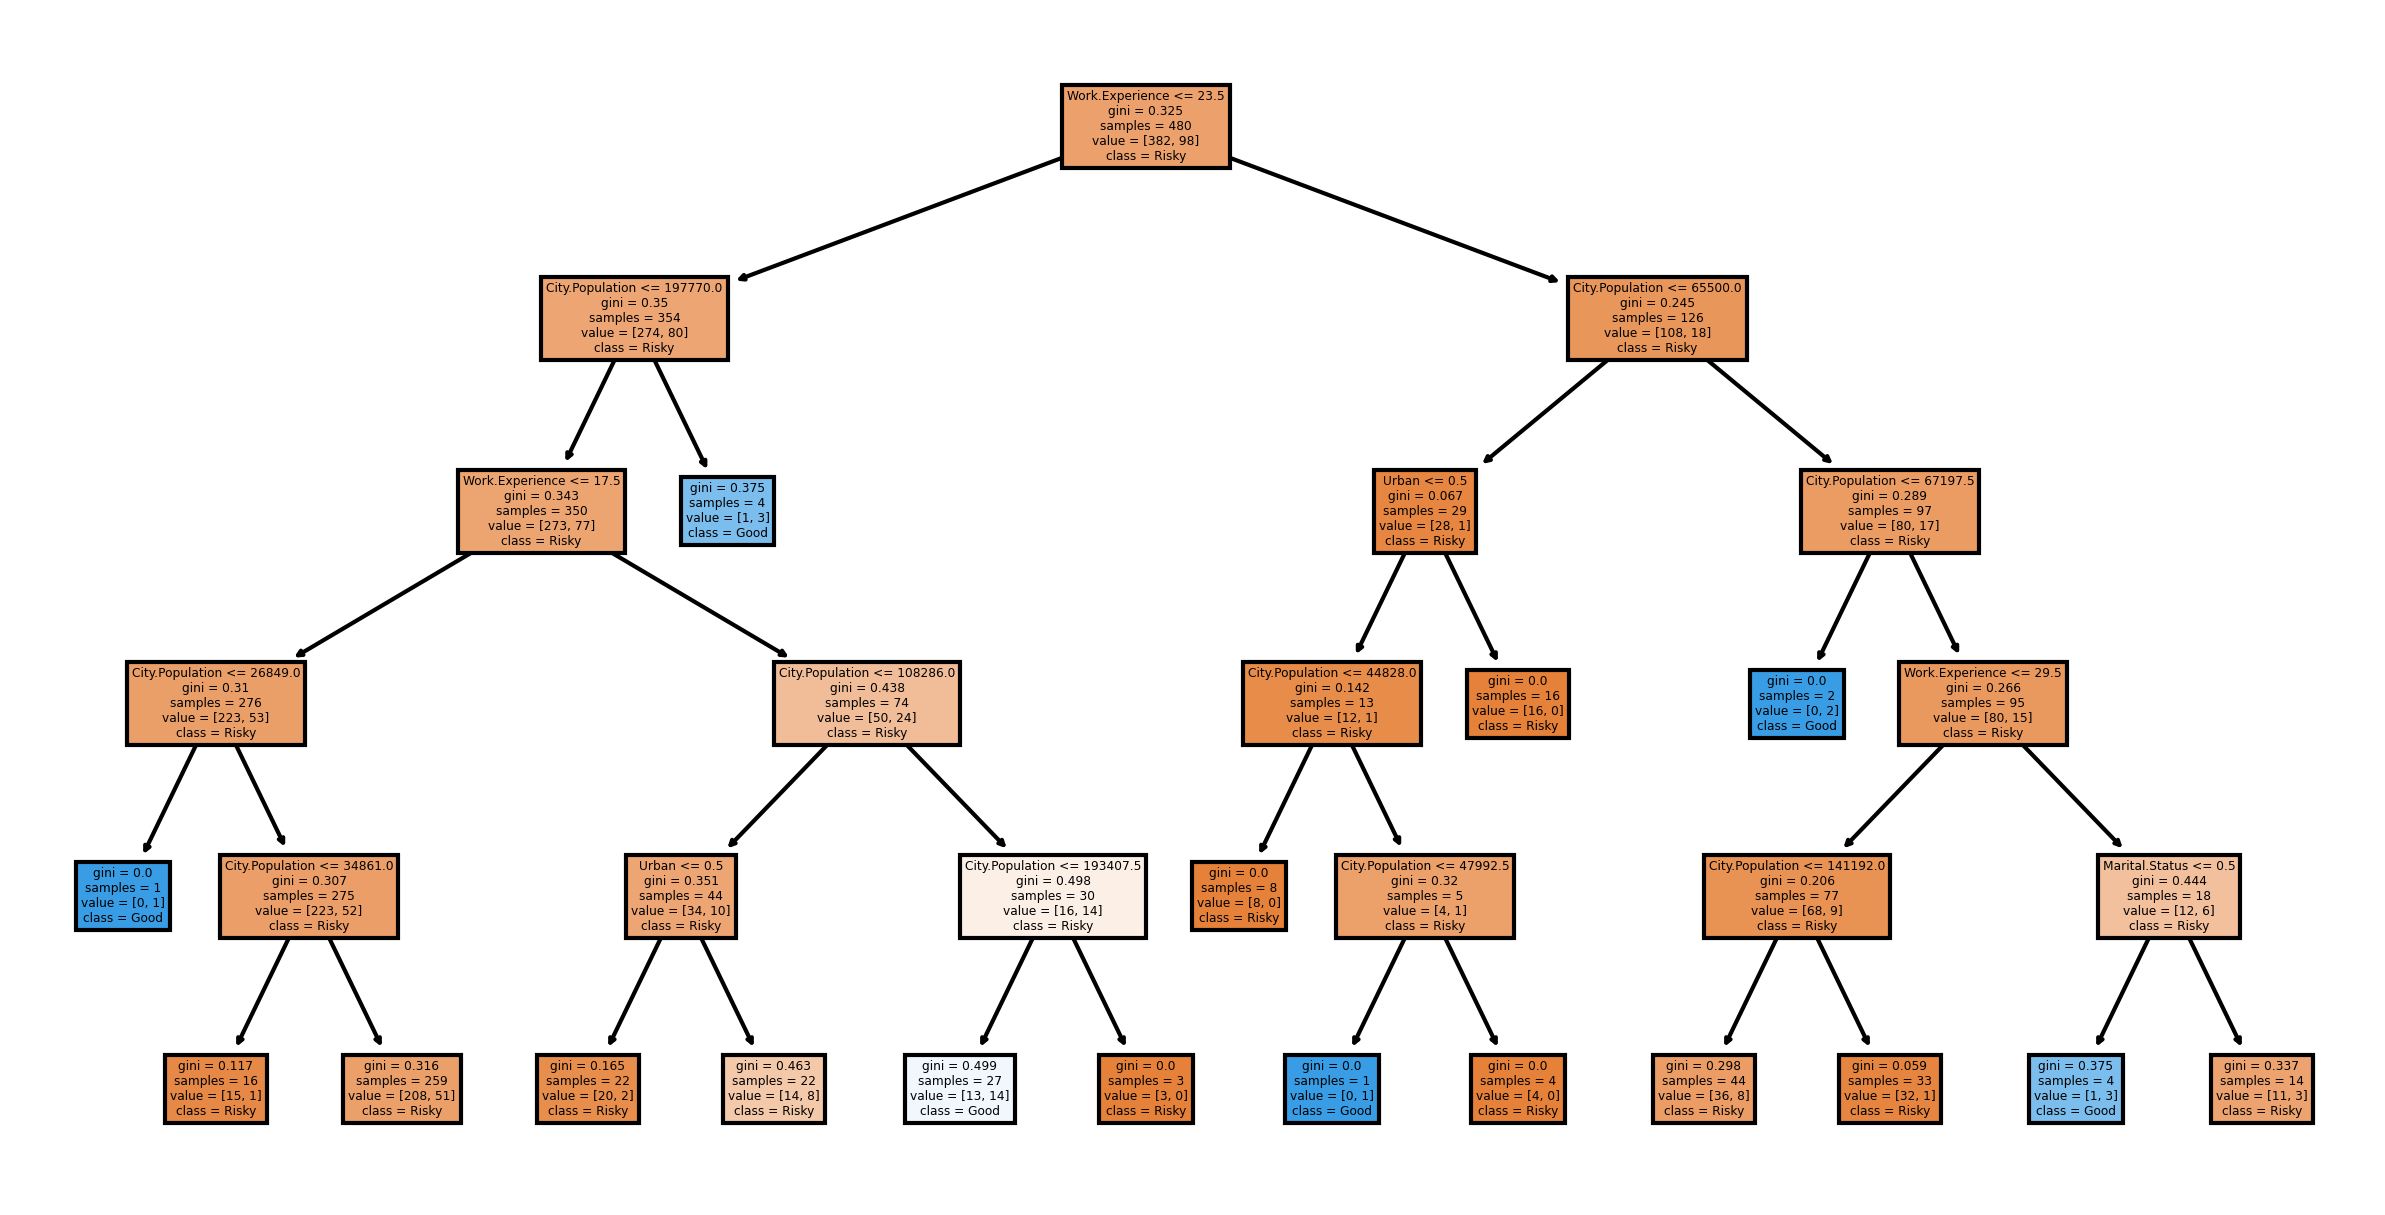

In [61]:
features =  ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
classnames = ["Risky" , "Good"]
plt.subplots(figsize=(10,5),dpi=300)
tree.plot_tree(model1, feature_names = features , class_names = classnames , filled = True);

#  ALTERING THE VALUES OF HYPERPARAMETERS MAX_DEPTH AND MIN_SAMPLE_SPLIT  

In [62]:
model2 = DecisionTreeClassifier(criterion="gini",min_samples_split=4,max_depth=6)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        94
           1       0.29      0.08      0.12        26

    accuracy                           0.76       120
   macro avg       0.54      0.51      0.49       120
weighted avg       0.68      0.76      0.70       120



In [ ]:
# AS ITS A FRAUD CHECK DATA  AND IMBALANCED , IM FOCUSING ON INCREASING THE RECALL OF WEIGTED AVG ,NOW IT IS 76% 

In [64]:
#FURTHERMORE AS THE INCREASE EVEN MORE THERE IS A POTENTIAL PROBLEM OF OVERFITTING AND ALSO THE SCORES DIPS DOWN


model3 = DecisionTreeClassifier(criterion="gini",min_samples_split=4,max_depth=7)
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.85        94
           1       0.25      0.08      0.12        26

    accuracy                           0.75       120
   macro avg       0.52      0.51      0.49       120
weighted avg       0.67      0.75      0.69       120



# Using Entropy method

In [65]:
model4 = DecisionTreeClassifier(criterion="entropy",min_samples_split=4,max_depth=6)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=4)

In [66]:
pred = model4.predict(x_test)

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        94
           1       0.38      0.12      0.18        26

    accuracy                           0.77       120
   macro avg       0.58      0.53      0.52       120
weighted avg       0.70      0.77      0.72       120



In [70]:
''' THERE IS NOT MUCH DIFFERENCE IN CHANGING THE METRICS FROM GINI TO ENTROPY , HENCE WE CONCLUDE THAT THE MODEL PROVIDES BETTER 
WEIGHTED AVG RECALL OF 76% WITHOUT SHOWING SIGNS OF OVERFITTING '''

' THERE IS NOT MUCH DIFFERENCE IN CHANGING THE METRICS FROM GINI TO ENTROPY , HENCE WE CONCLUDE THAT THE MODEL PROVIDES BETTER \nWEIGHTED AVG RECALL OF 76% WITHOUT SHOWING SIGNS OF OVERFITTING '

In [71]:
model2.score(x_train,y_train)

0.825

In [72]:
model2.score(x_test,y_test)

0.7583333333333333

In [73]:
accuracy = metrics.accuracy_score(y_test,pred,)
precision = metrics.precision_score(y_test, pred , pos_label=1,average="weighted")
recall = metrics.recall_score(y_test,pred, pos_label=1,average="weighted")
f1_score = metrics.f1_score(y_test,pred , pos_label=1,average="weighted")
print("The accuracy is ",accuracy)
print("The precision is ",precision)
print("The Recall is ",recall)
print("The F1 score is ",f1_score)

The accuracy is  0.7666666666666667
The precision is  0.7037202380952381
The Recall is  0.7666666666666667
The F1 score is  0.7150961355415953
